In [1]:
import sys
import os

module_path = os.path.abspath(os.path.join('../../../..'))
if module_path not in sys.path:
    sys.path.append(module_path)

from qiskit.circuit.random import random_circuit

from circuit_knitting.cutting.gate_and_wire_cutting.frontend import cut_wires_and_gates_to_subcircuits
from circuit_knitting.cutting.gate_and_wire_cutting.frontend import execute_simulation
from circuit_knitting.cutting.cutting_reconstruction import reconstruct_expectation_values
from circuit_knitting.cutting.gate_and_wire_cutting.frontend import exact_observables
from circuit_knitting.cutting.gate_and_wire_cutting.frontend import compare_results

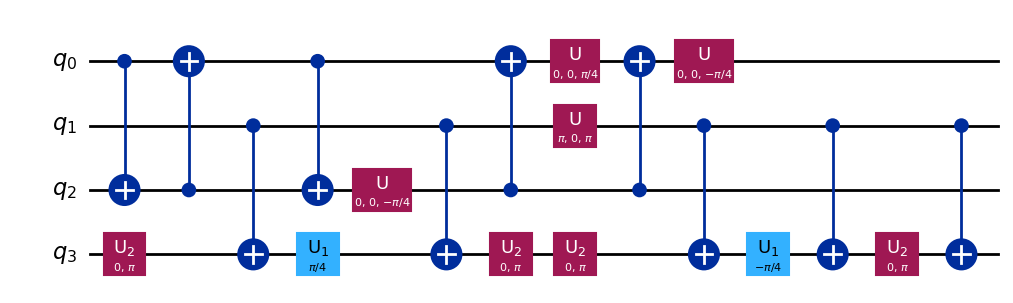

In [2]:
q = 4

circuit = random_circuit(q, 2, measure=False).decompose(reps=3)
circuit.draw('mpl')

In [3]:
observables = ['Z'*q]

If there is an error in the below cell, simply re-create the random circuit. An error suggests that not all qubits are entangled, and therefore do not even require cutting in the first place. 

In [4]:
subcircuits, subobservables, wire_cuts, gate_cuts = cut_wires_and_gates_to_subcircuits(
    circuit=circuit,
    observables=observables,
    method='automatic',
    max_subcircuit_width=2,
    max_cuts=4,
    num_subcircuits=[2],
    model='gurobi'
)

Restricted license - for non-production use only - expires 2025-11-24
Set parameter TimeLimit to value 300
Set parameter Cutoff to value 1e+100
Gurobi Optimizer version 11.0.3 build v11.0.3rc0 (mac64[arm] - Darwin 23.5.0 23F79)

CPU model: Apple M1 Pro
Thread count: 8 physical cores, 8 logical processors, using up to 8 threads

Optimize a model with 261 rows, 115 columns and 870 nonzeros
Model fingerprint: 0x2d47dd3e
Variable types: 0 continuous, 115 integer (100 binary)
Coefficient statistics:
  Matrix range     [1e-02, 2e+00]
  Objective range  [1e+00, 1e+00]
  Bounds range     [1e+00, 1e+01]
  RHS range        [1e+00, 2e+00]
Presolve removed 261 rows and 115 columns
Presolve time: 0.00s
Presolve: All rows and columns removed

Explored 0 nodes (0 simplex iterations) in 0.01 seconds (0.00 work units)
Thread count was 1 (of 8 available processors)

Solution count 1: 0 

Optimal solution found (tolerance 1.00e-04)
Best objective 0.000000000000e+00, best bound 0.000000000000e+00, gap 0.0

In [5]:
gate_cuts

0

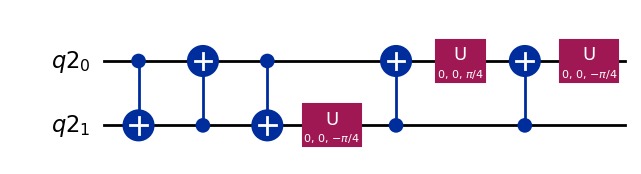

In [6]:
subcircuits[0].draw('mpl')

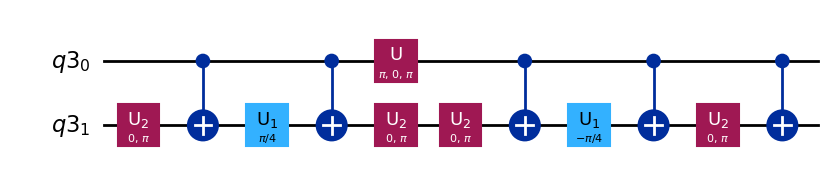

In [7]:
subcircuits[1].draw('mpl')

In [8]:
# Execute the subcircuits
quasi_dists, coefficients = execute_simulation(subcircuits, subobservables)

simulation_expvals = reconstruct_expectation_values(quasi_dists, coefficients, subobservables)
simulation_expvals

[np.float64(-0.0205078125)]

In [9]:
# Create ideal results
ideal_expvals = exact_observables(circuit, observables)
ideal_expvals

array([3.33066907e-16])

In [10]:
# Compare the error between results
a, b = compare_results(simulation_expvals, ideal_expvals)

Simulated expectation values: [np.float64(-0.02050781)]
Exact expectation values: [np.float64(0.0)]
Errors in estimation: [np.float64(-0.02050781)]
Relative errors in estimation: [np.float64(-61572651155457.0)]


In [11]:
a, b

([np.float64(-0.02050781)], [np.float64(-61572651155457.0)])